In [75]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [76]:
# Importing the data for analysis
df_data = pd.read_csv(r"P:\Shrishti\train.csv")

In [77]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

In [78]:
# Displaying some data from 'CarPrice_Assignment.csv'
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
# Getting deatils for data dictionary
print(f'\nShape of dataframe:\n{df_data.shape}')
print(f'\nCount of dataframe:\n{df_data.count()}')
print(f'\nColumns in dataframe:\n{df_data.columns}')
print(f'\nDescription of dataframe:\n{df_data.describe()}')
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')


Shape of dataframe:
(1460, 81)

Count of dataframe:
Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1

# Cleaning Dataset

In [80]:
# Dropping duplicate values in dataset, if exist
df_data = df_data.drop_duplicates()
print(f'\nShape of dataframe:\n{df_data.shape}')
df_data.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
# Removing identifier field
df_data.drop(['Id'], axis=1, inplace=True)

In [82]:
# Removing columns where unique values are 1 as it illustrates that all values are same in column
uniques = df_data.apply(lambda x:x.nunique())
df_loan = df_data.drop(uniques[uniques < 2].index, axis = 1)
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1460, 80)
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00


In [83]:
# Dropping Columns with more than 15 % missing values
df_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [84]:
# Analysing columns which still have NaN values
print(df_data['MasVnrType'].describe(), end='\n\n')      # 0.55% NaN
print(df_data['MasVnrArea'].describe(), end='\n\n')      # 0.55% NaN
print(df_data['BsmtQual'].describe(), end='\n\n')        # 2.53% NaN
print(df_data['BsmtCond'].describe(), end='\n\n')        # 2.53% NaN
print(df_data['BsmtExposure'].describe(), end='\n\n')    # 2.60% NaN
print(df_data['BsmtFinType1'].describe(), end='\n\n')    # 2.53% NaN
print(df_data['BsmtFinType2'].describe(), end='\n\n')    # 2.60% NaN
print(df_data['Electrical'].describe(), end='\n\n')      # 0.07% NaN
print(df_data['GarageType'].describe(), end='\n\n')      # 5.55% NaN
print(df_data['GarageYrBlt'].describe(), end='\n\n')     # 5.55% NaN
print(df_data['GarageFinish'].describe(), end='\n\n')    # 5.55% NaN
print(df_data['GarageQual'].describe(), end='\n\n')      # 5.55% NaN
print(df_data['GarageCond'].describe(), end='\n\n')      # 5.55% NaN

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

count    1379.000000
mean     1978.50616

In [85]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
df_data.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
Ha

In [86]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df_data['DiffYearBuilt'] = pd.datetime.now().year - df_data['YearBuilt']
df_data['DiffYearRemodAdd'] = pd.datetime.now().year - df_data['YearRemodAdd']
df_data['DiffGarageYrBlt'] = pd.datetime.now().year - df_data['GarageYrBlt']

In [87]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',df_data[col].unique())

30
43
MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

# Summary

There are 1338 rows and 74 columns in cleaned dataframe

These 74 columns comprises of both dimensions (categorical value) and measures (numeric value)

There are 30 numeric columns, 43 categorical columns and 1 output column

# Exploratory Data Analysis

In [88]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]])

In [89]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df_data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df_data[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]], order=my_order.index)

<Figure size 640x480 with 0 Axes>

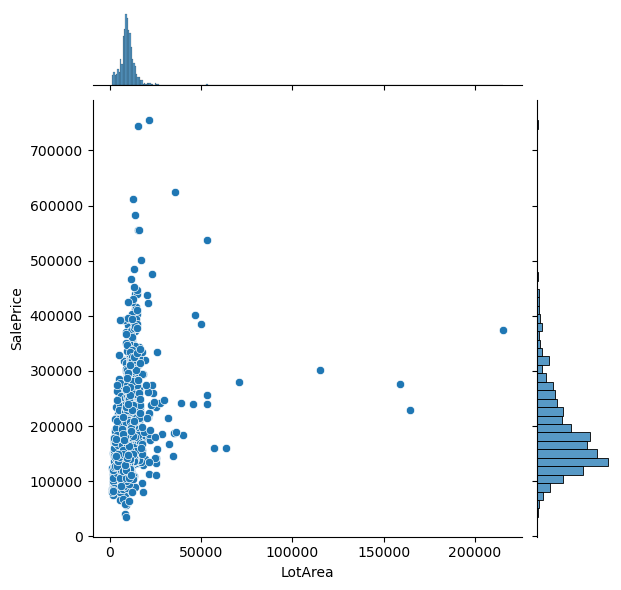

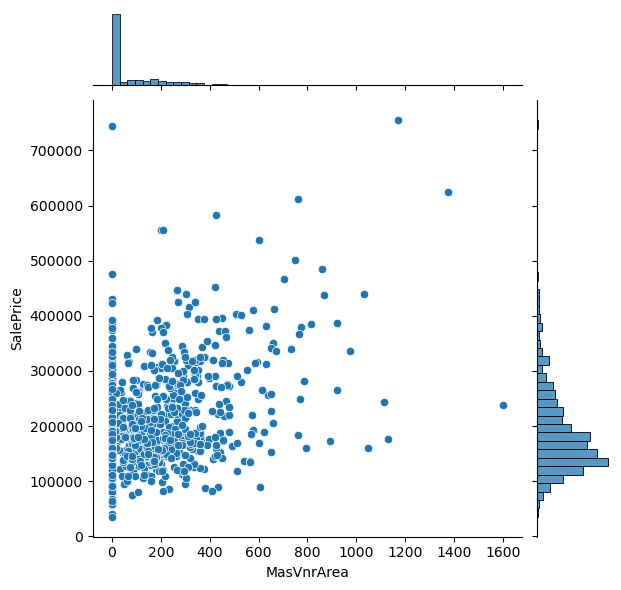

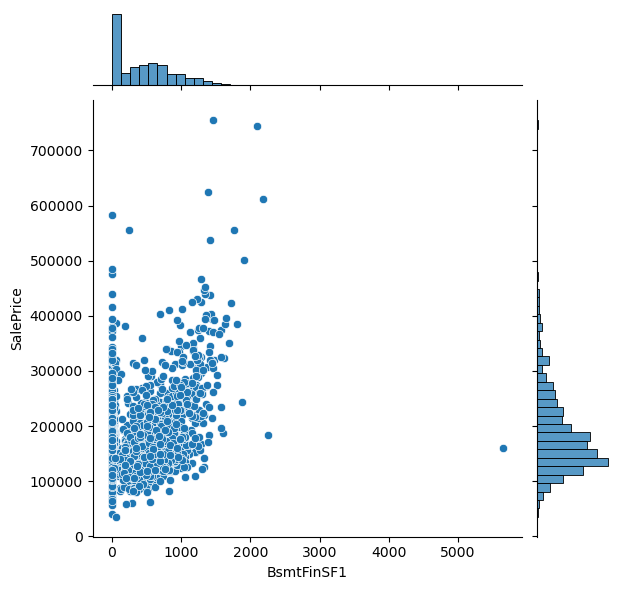

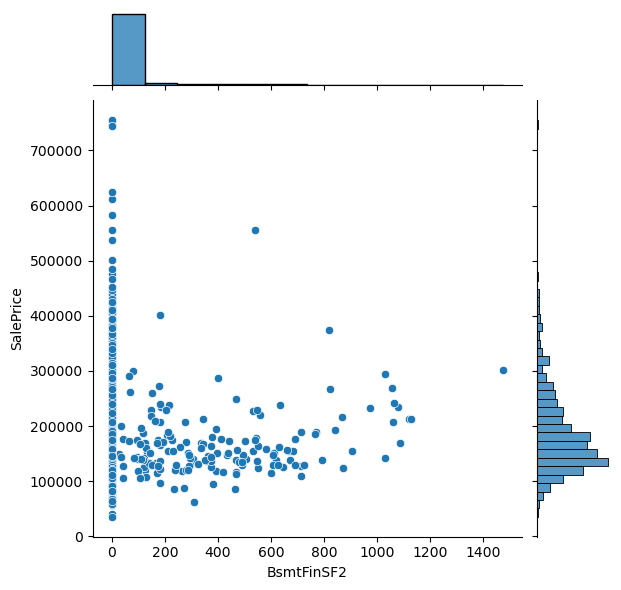

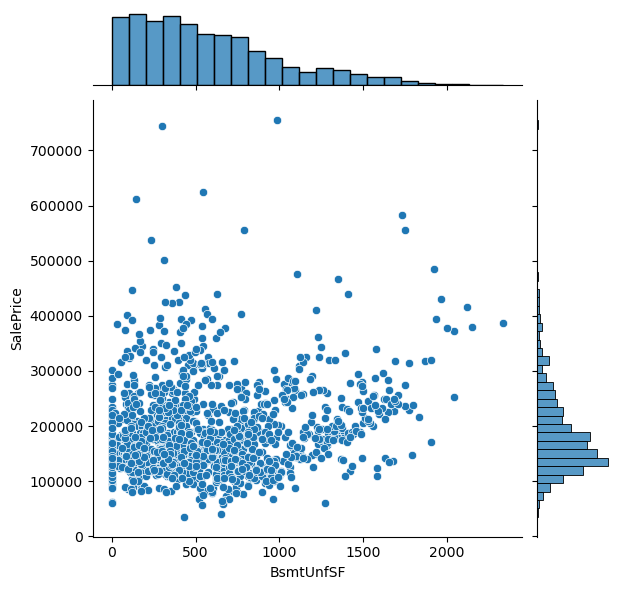

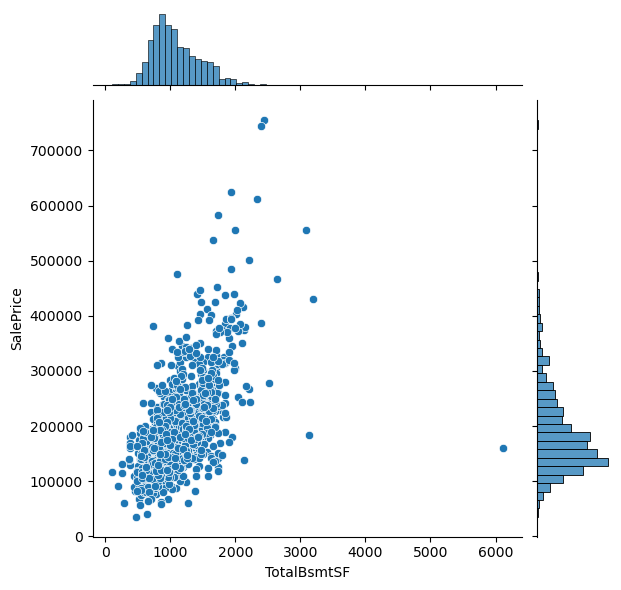

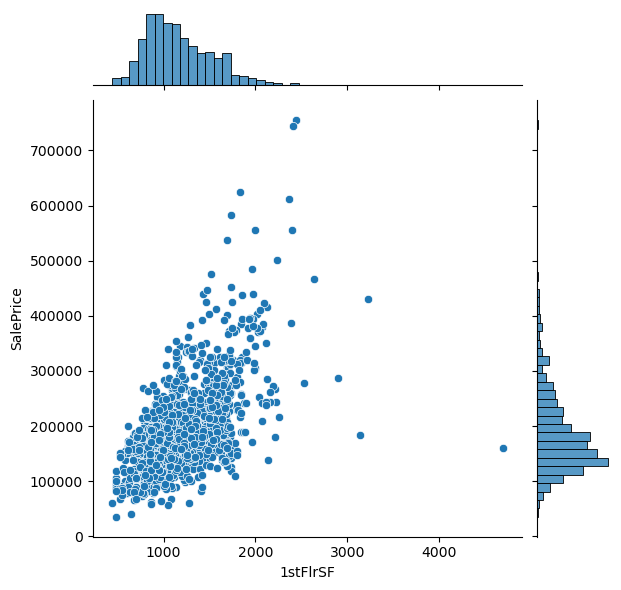

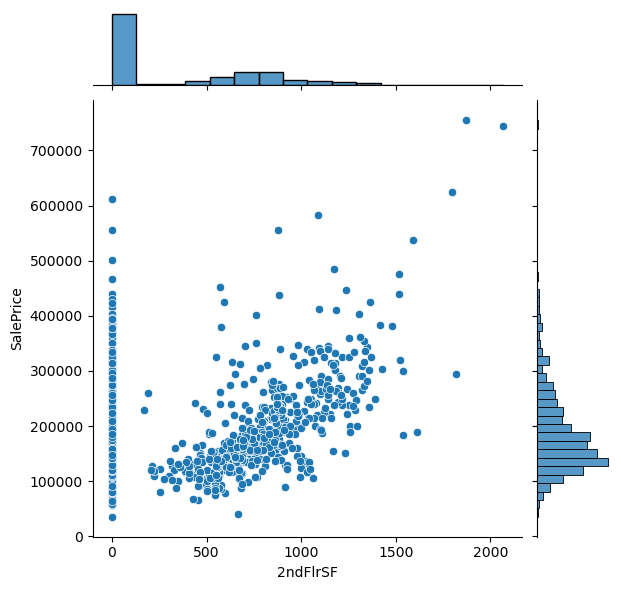

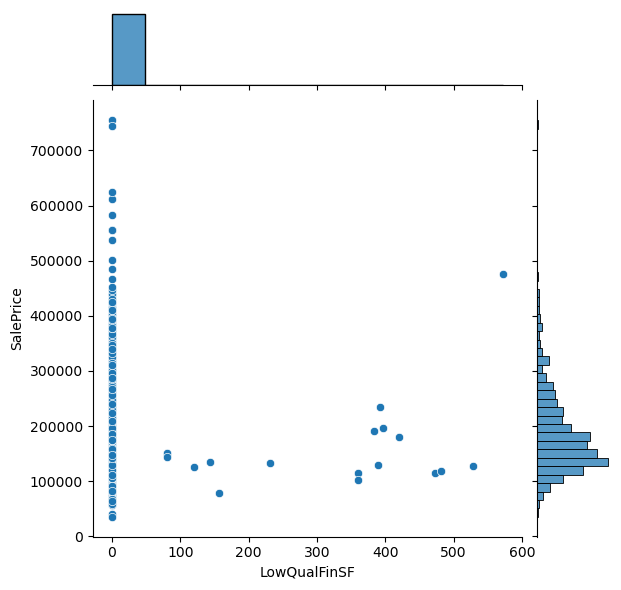

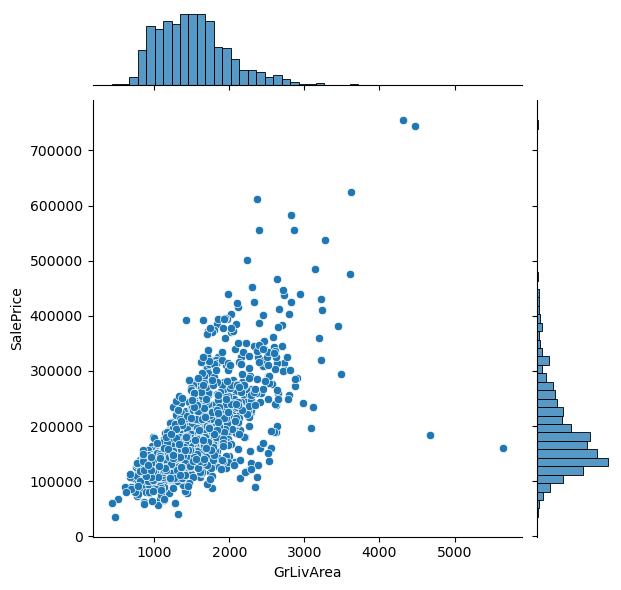

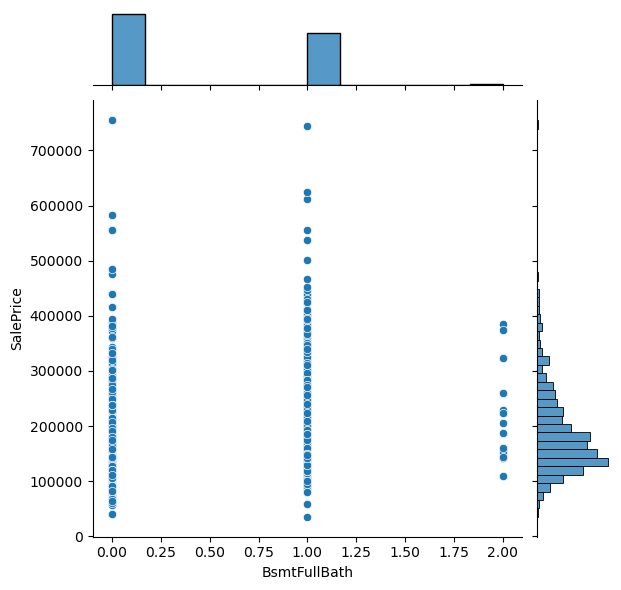

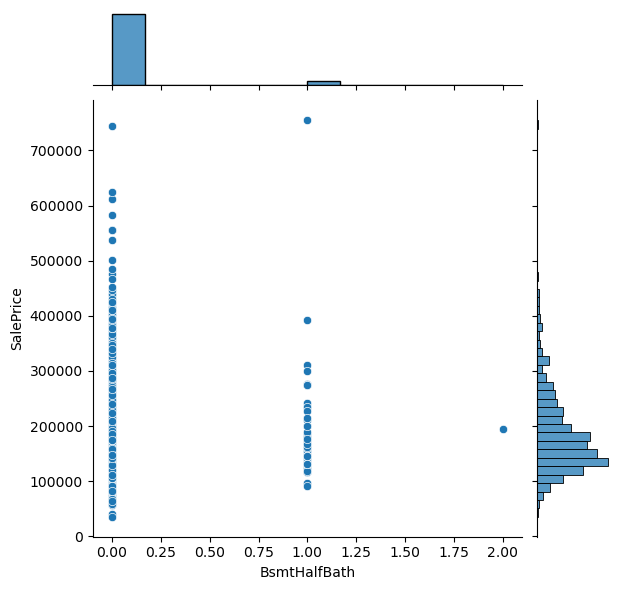

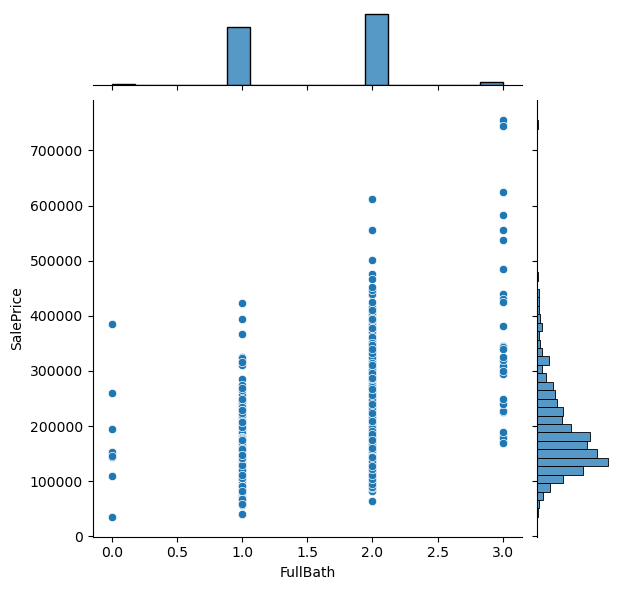

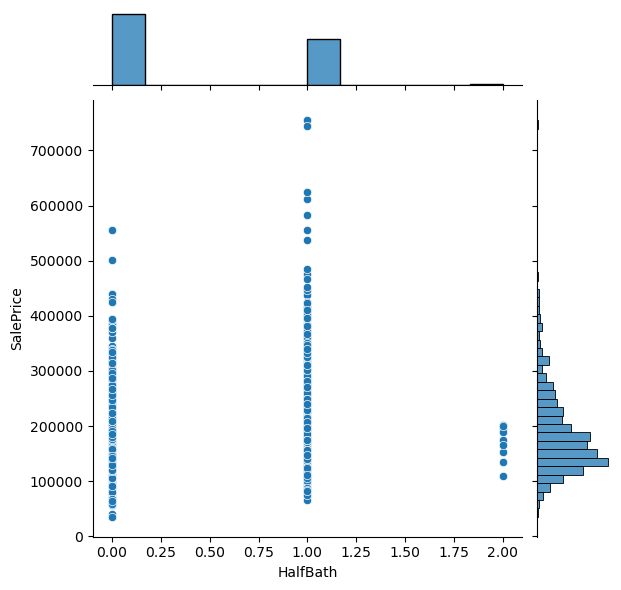

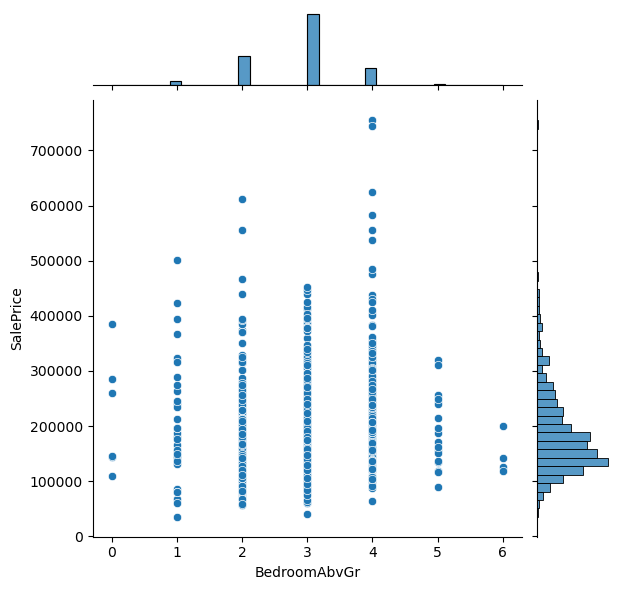

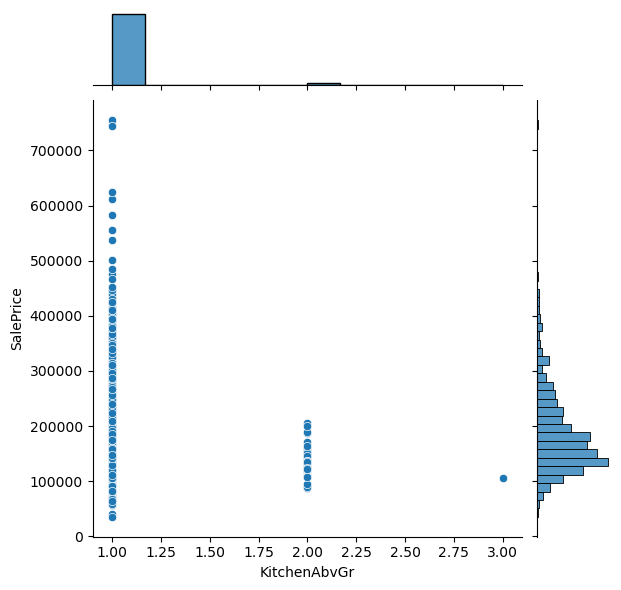

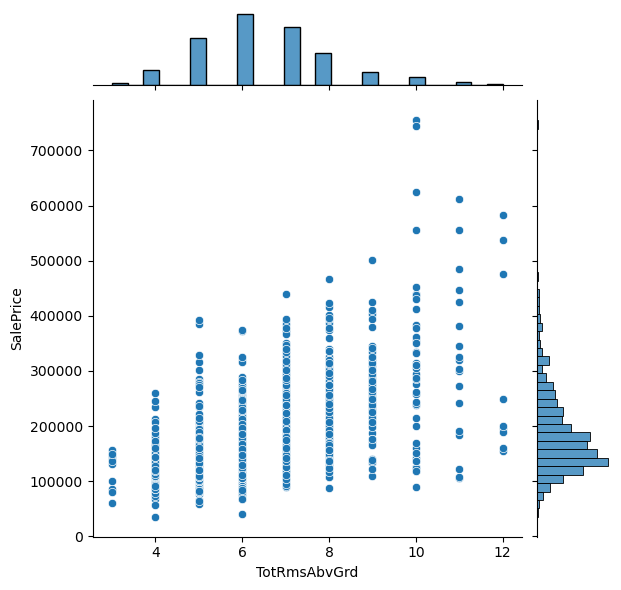

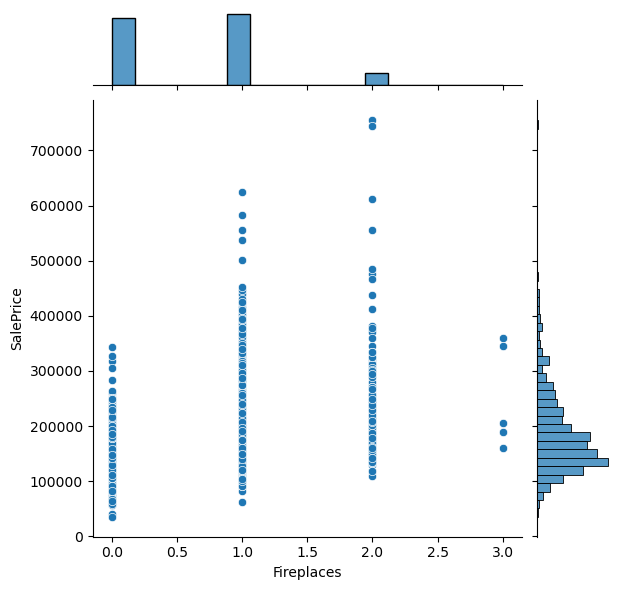

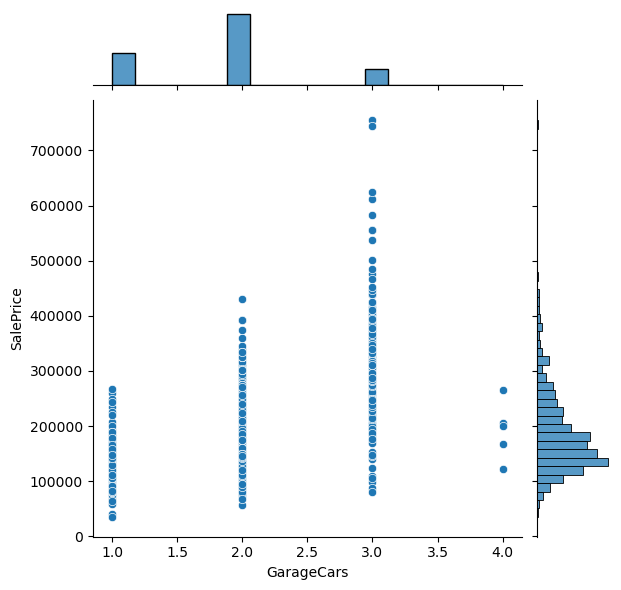

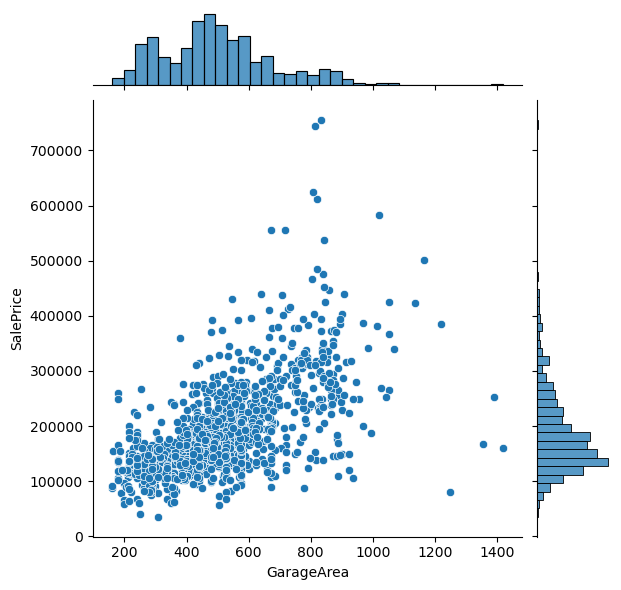

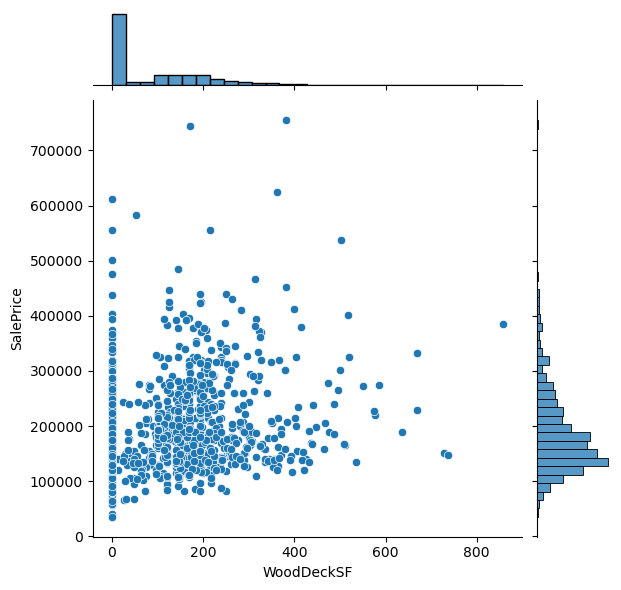

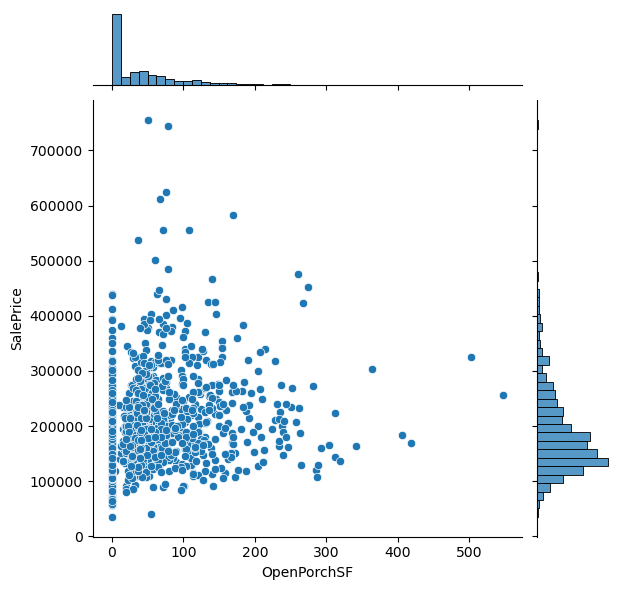

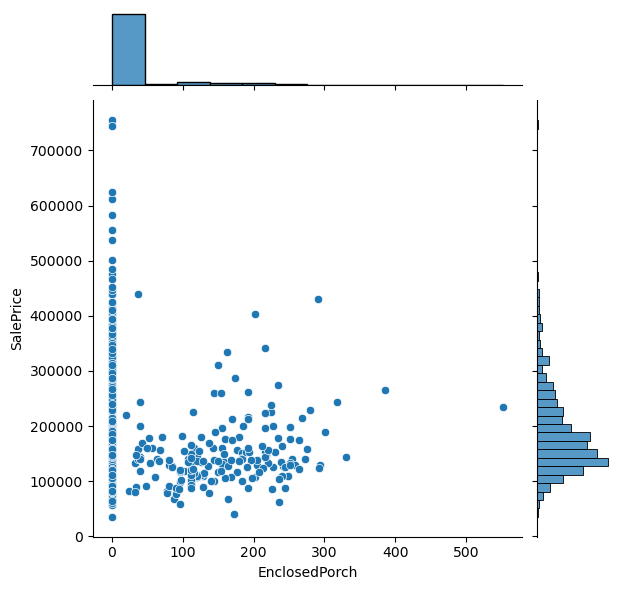

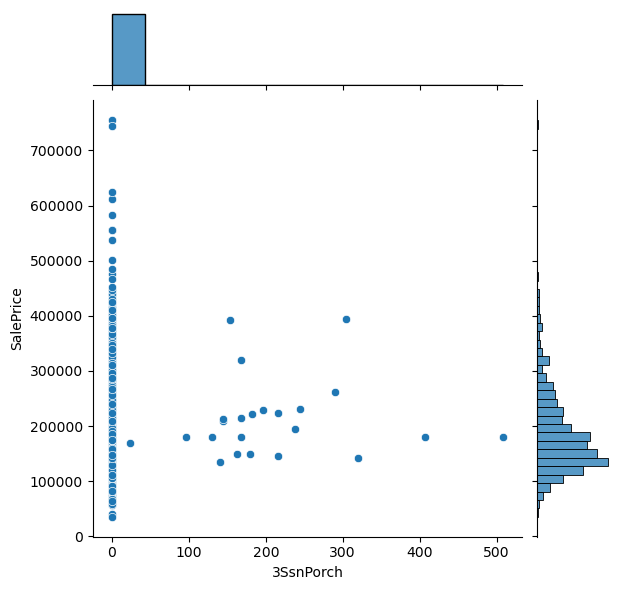

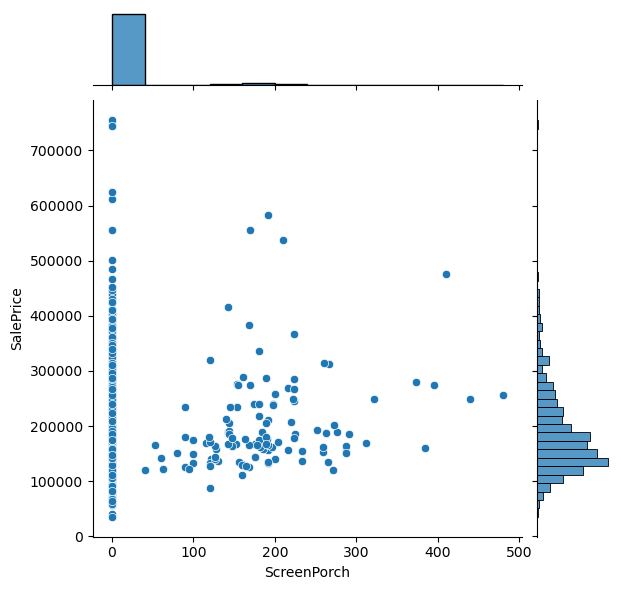

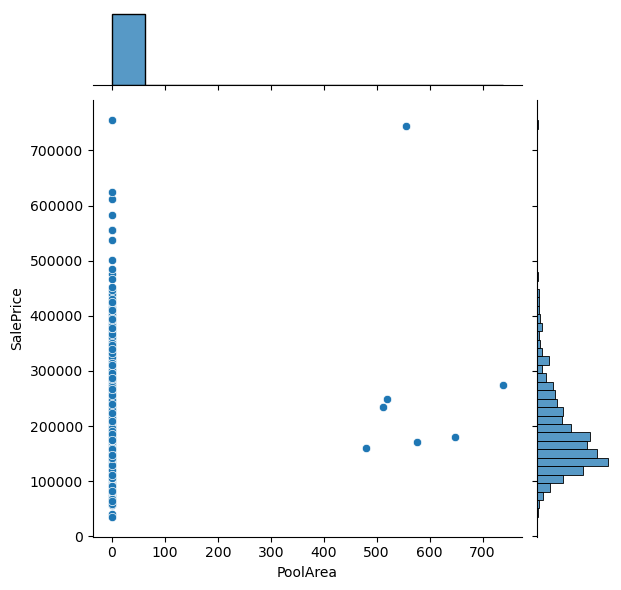

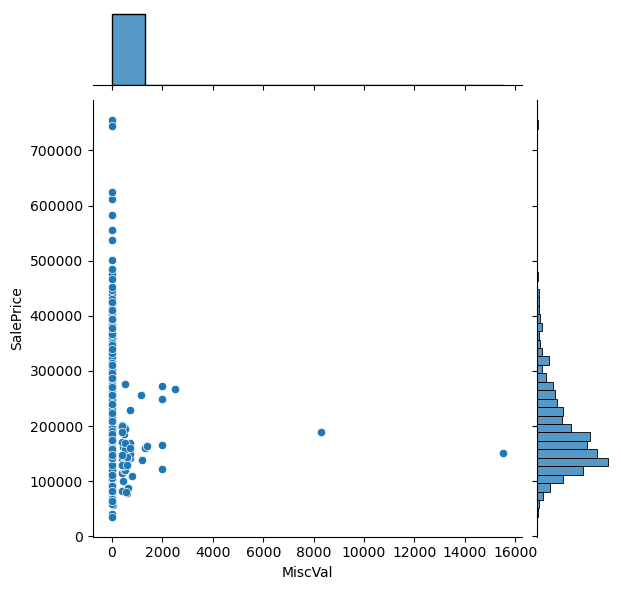

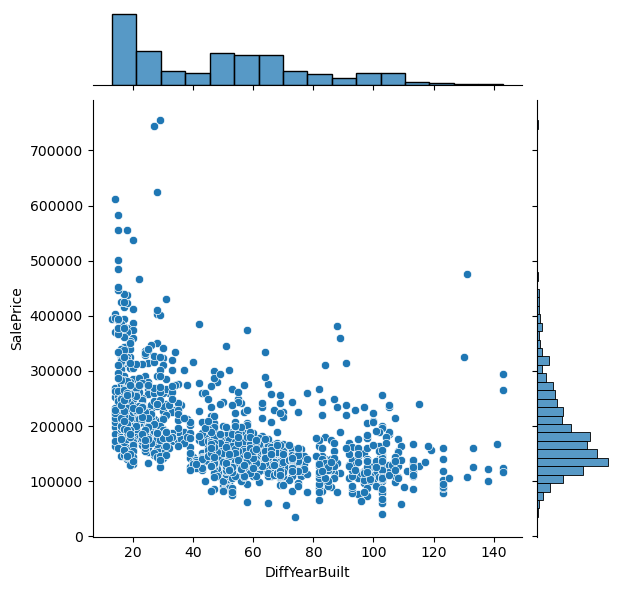

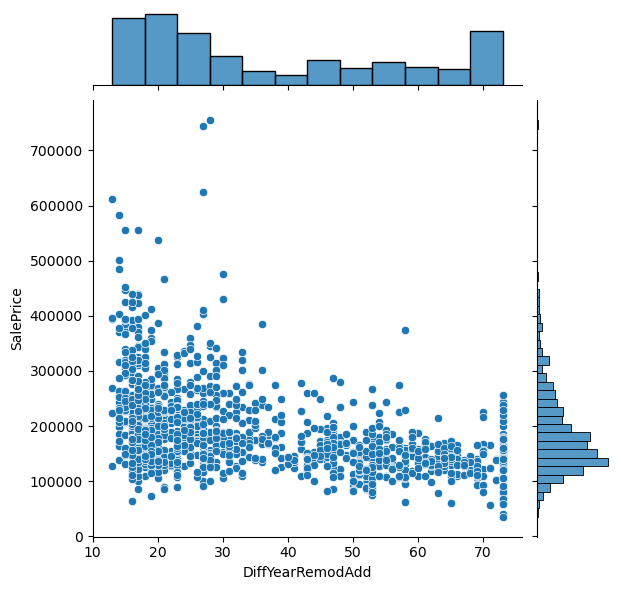

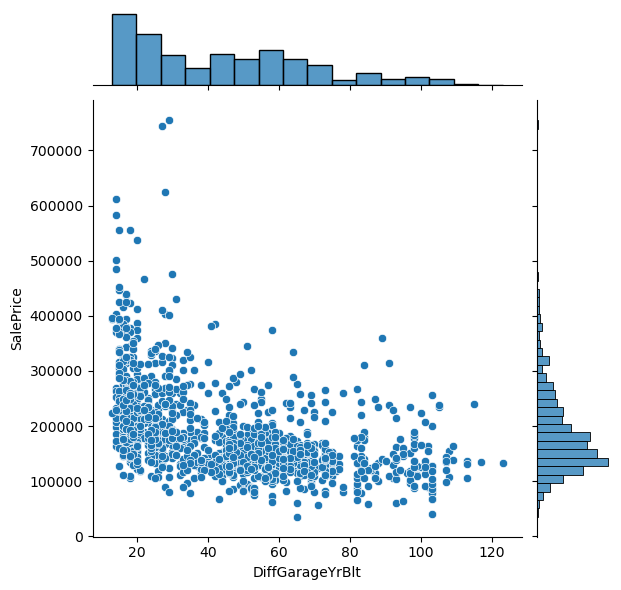

In [90]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

<Figure size 640x480 with 0 Axes>

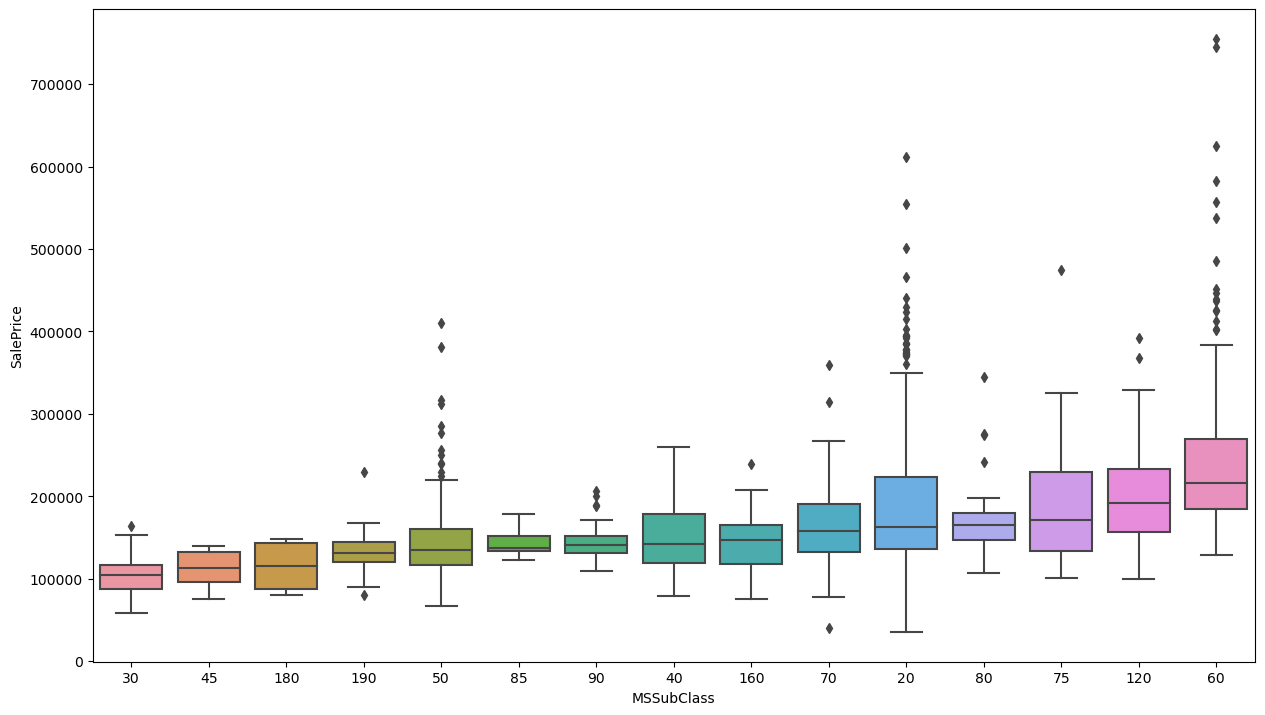

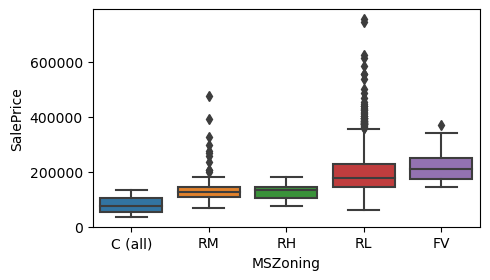

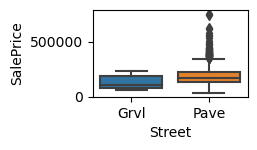

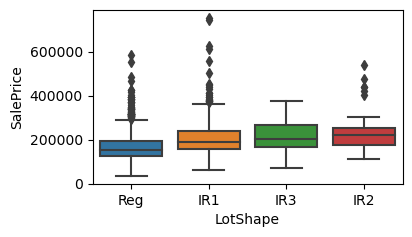

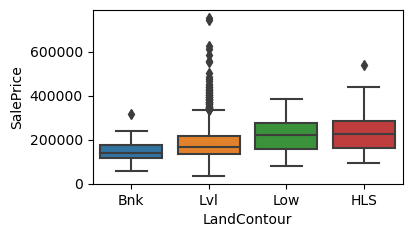

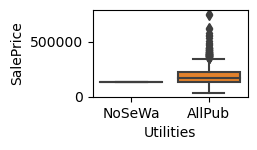

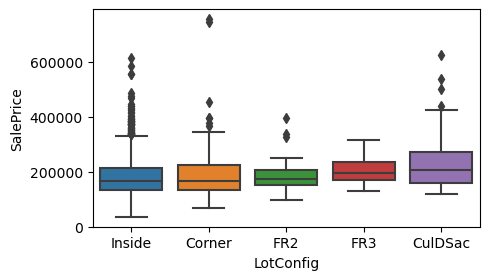

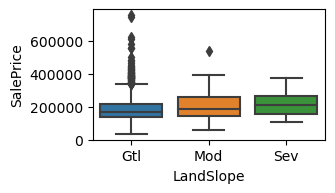

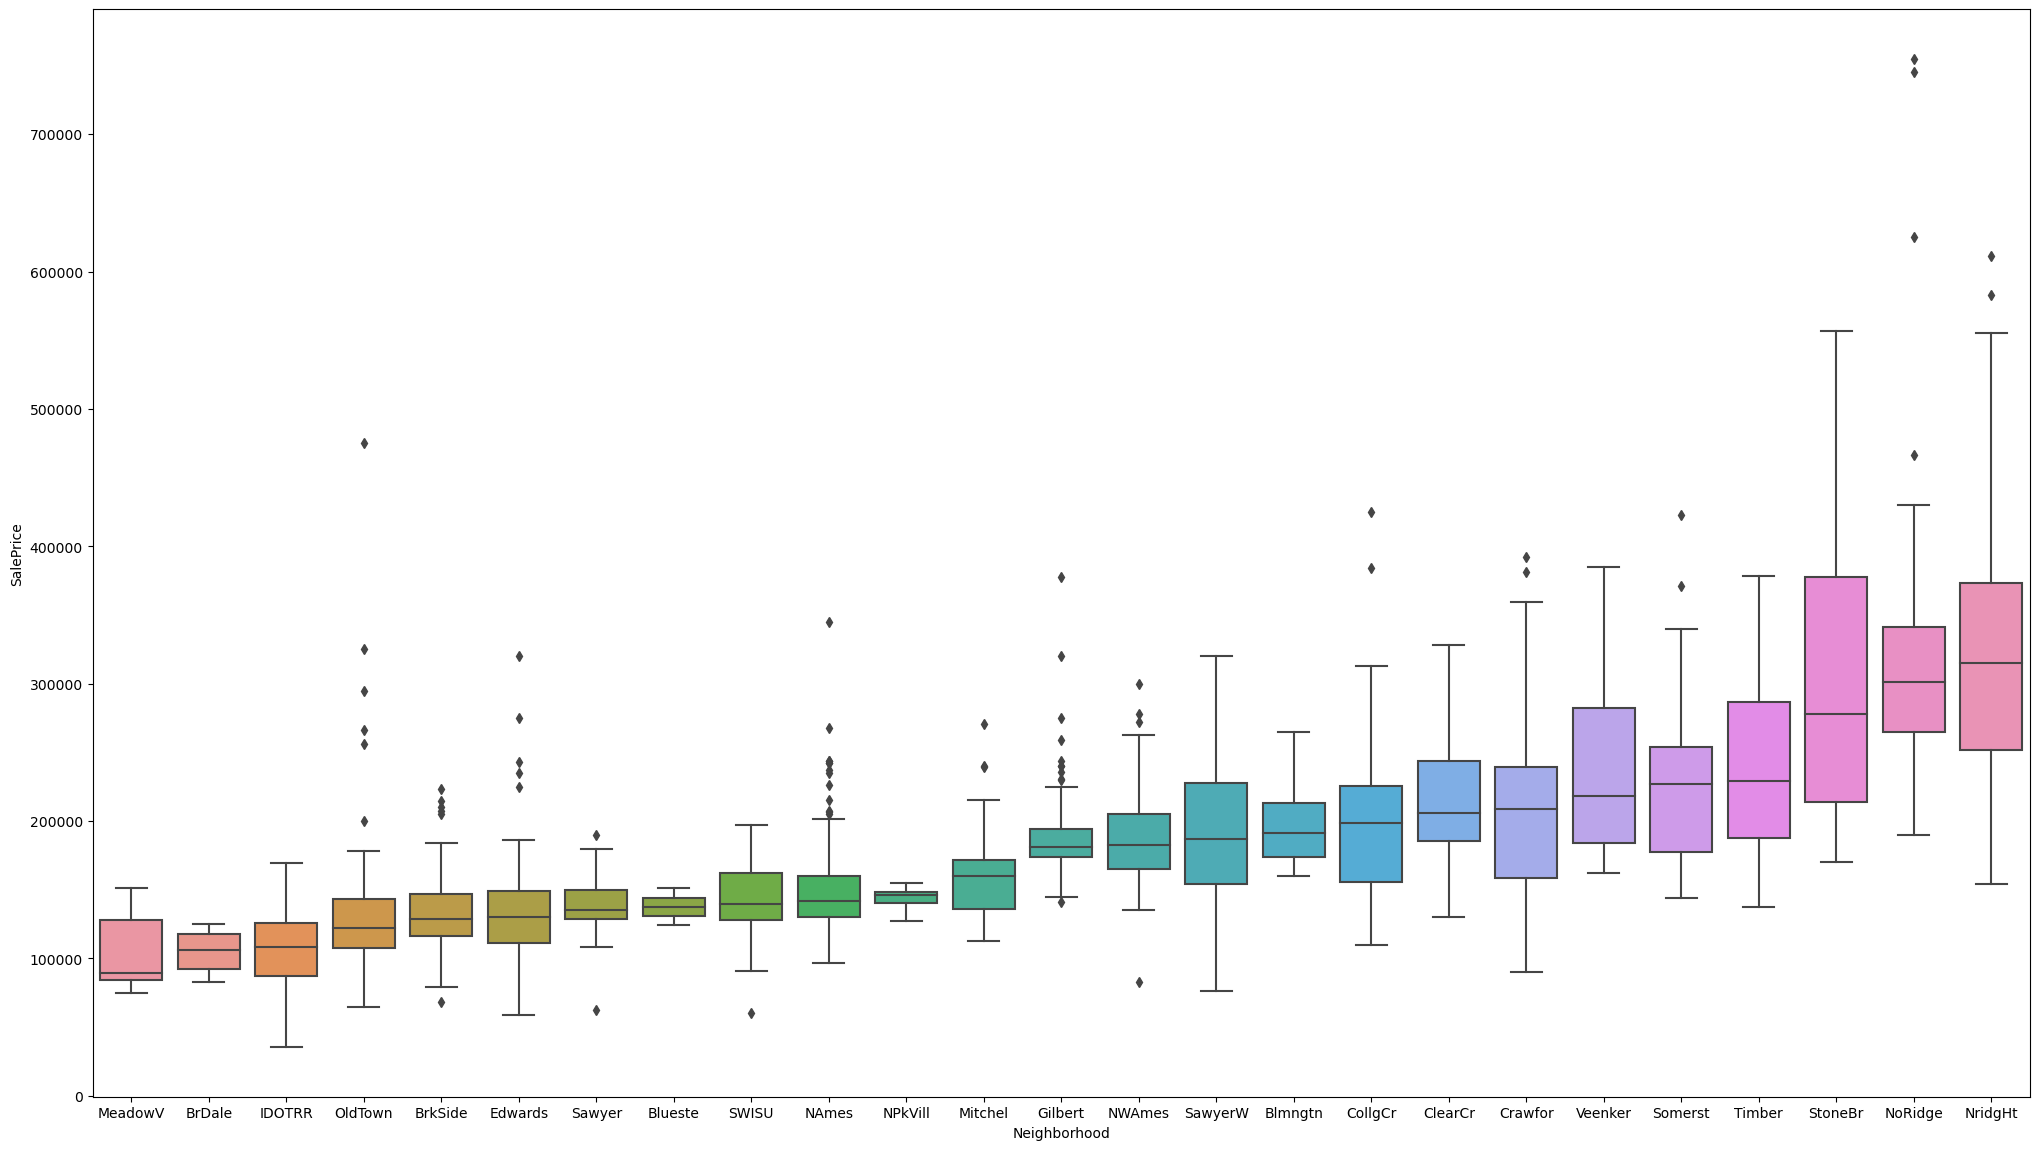

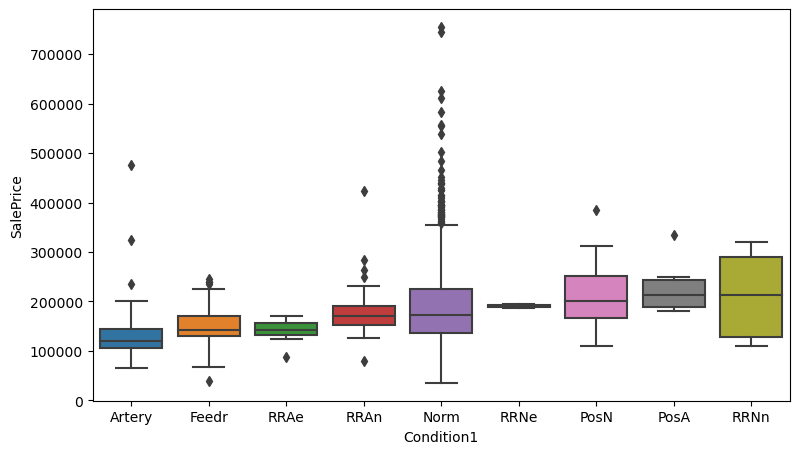

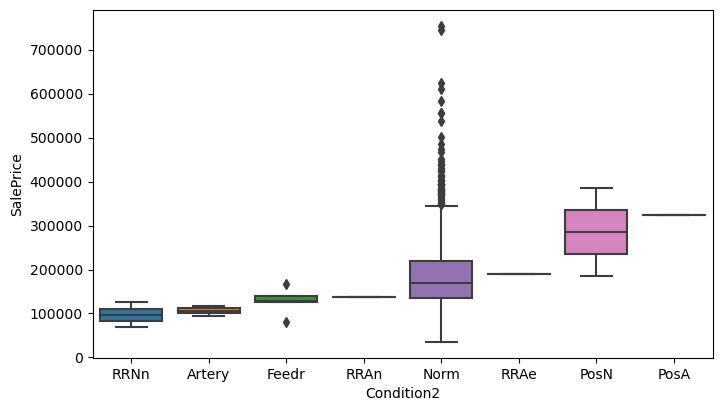

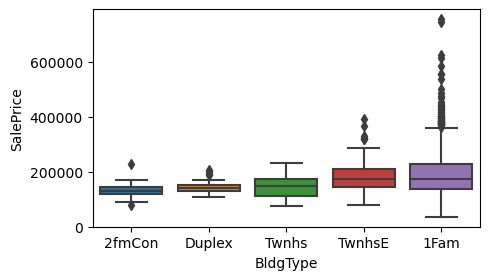

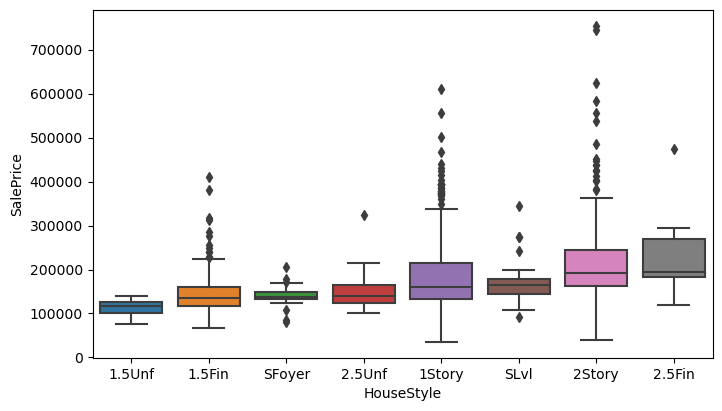

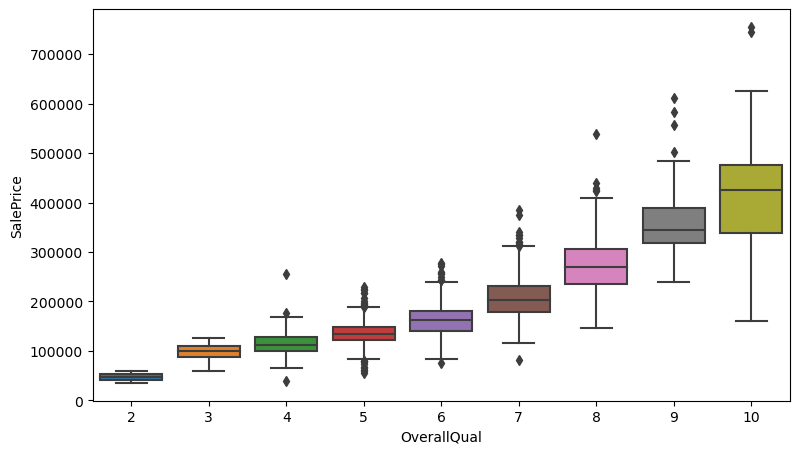

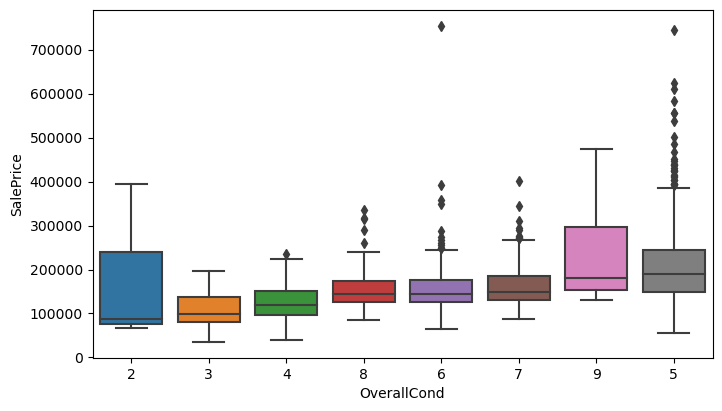

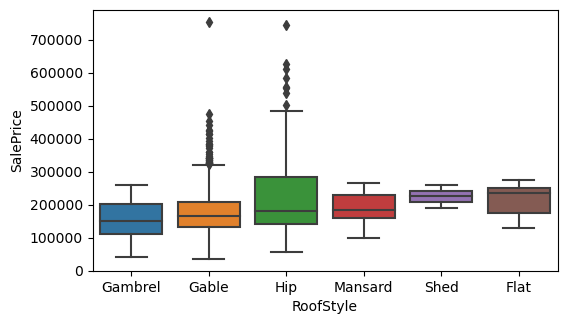

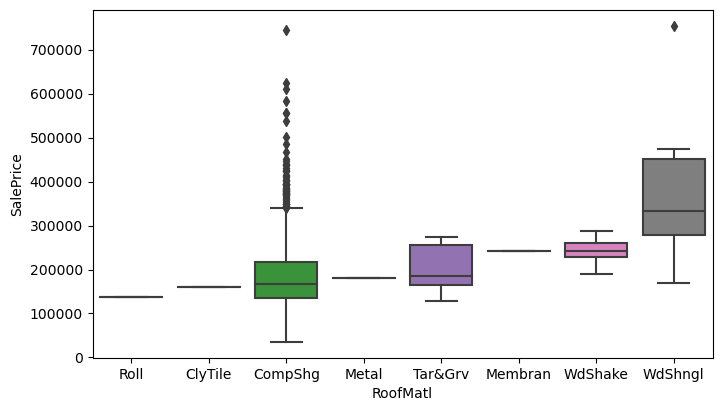

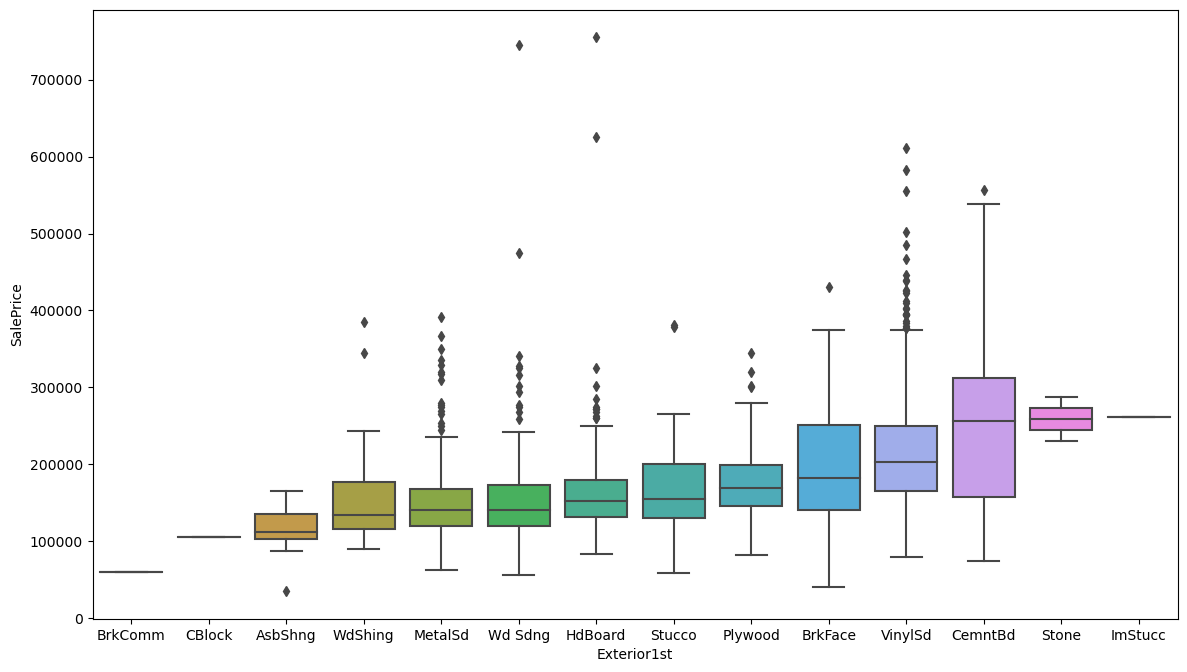

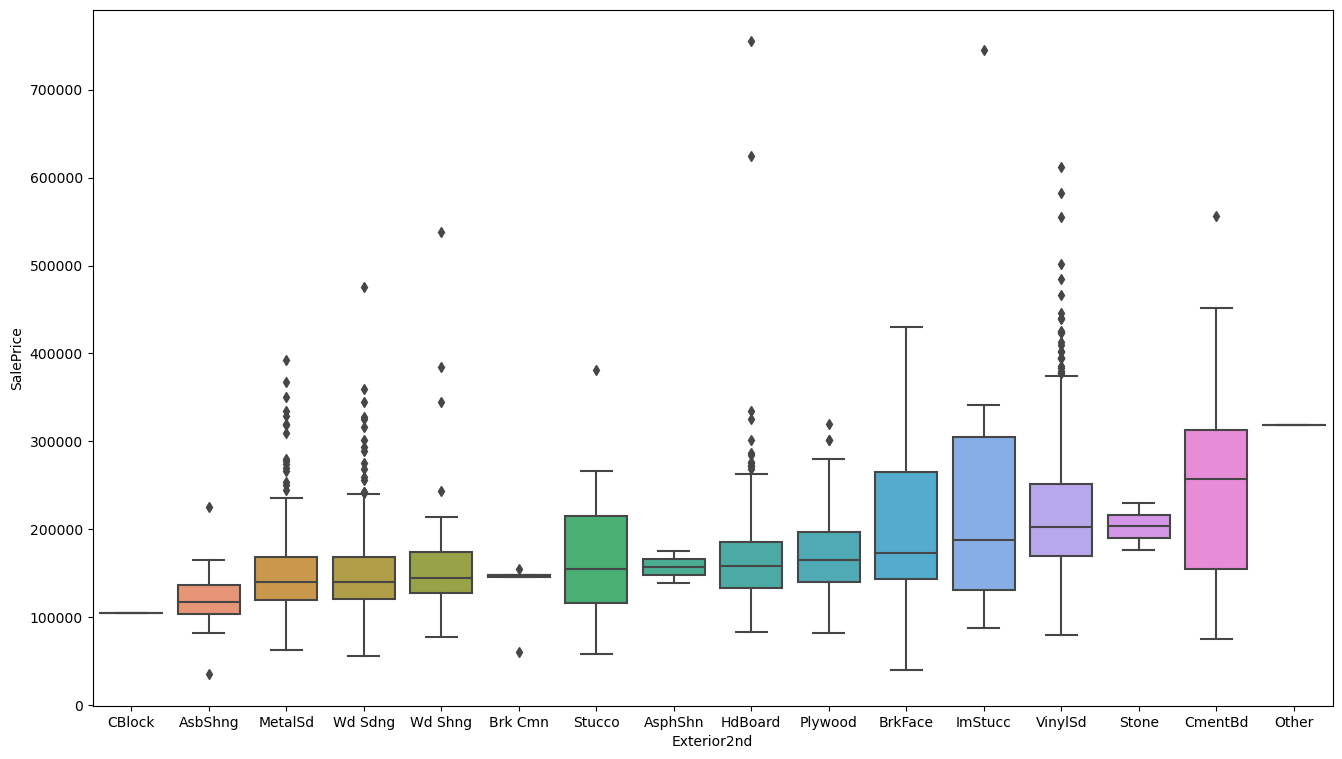

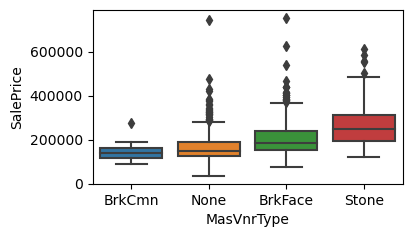

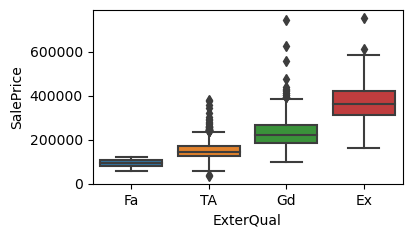

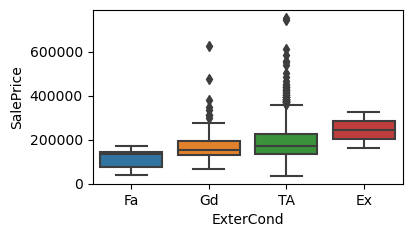

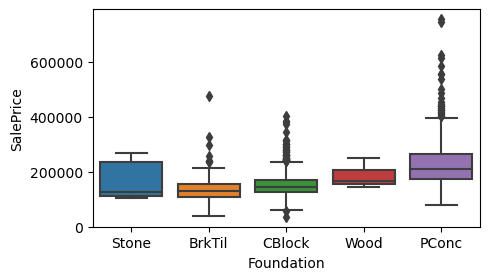

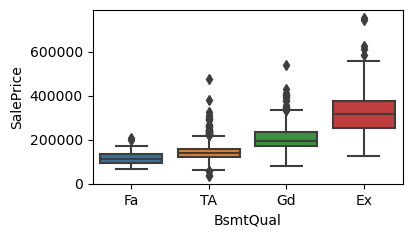

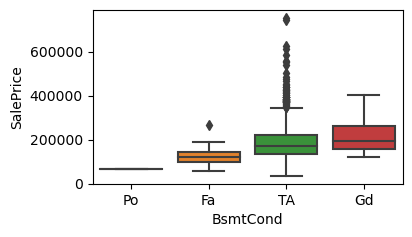

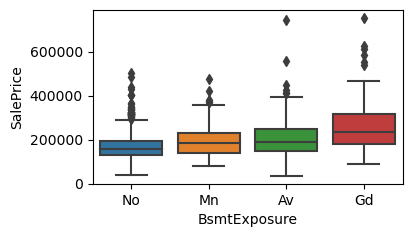

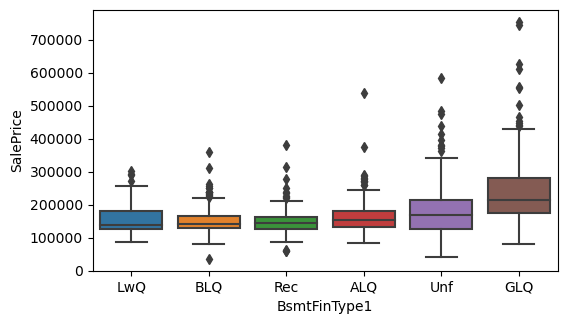

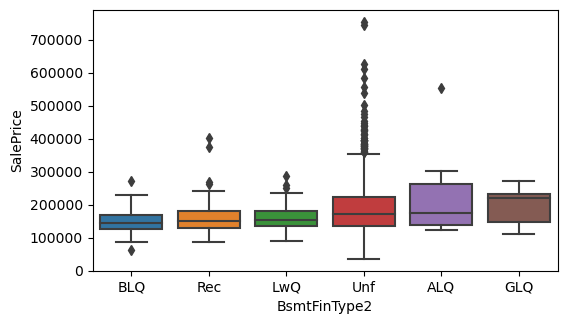

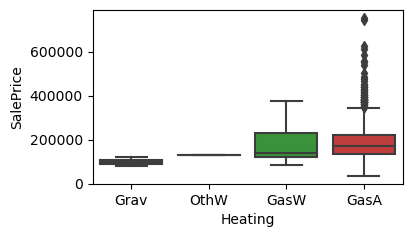

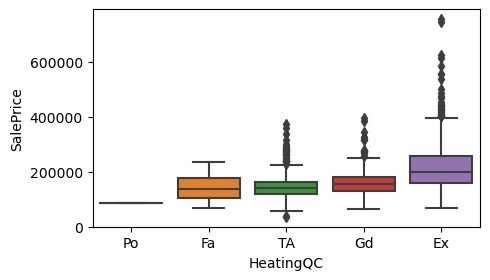

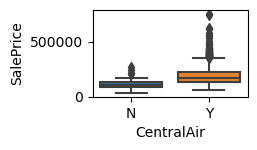

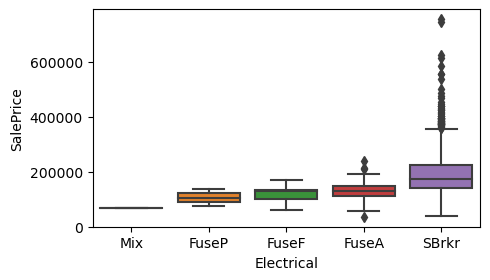

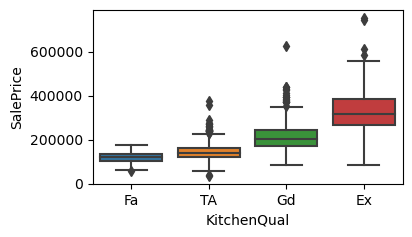

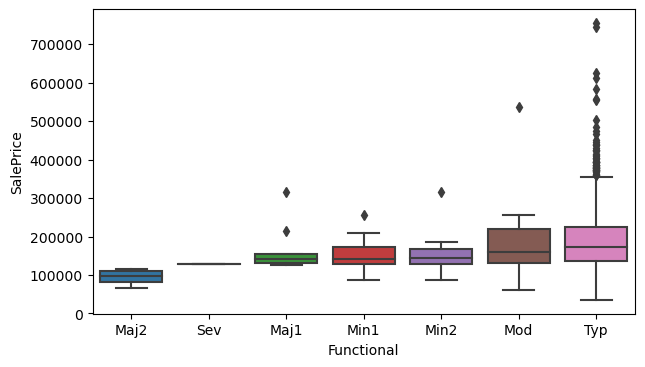

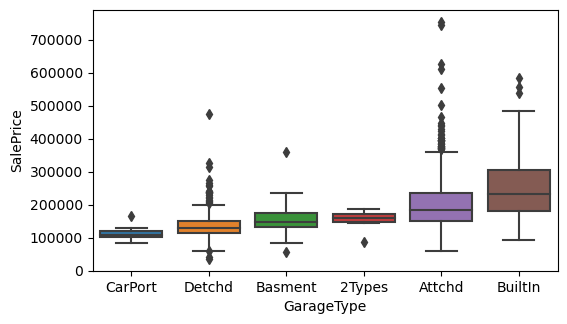

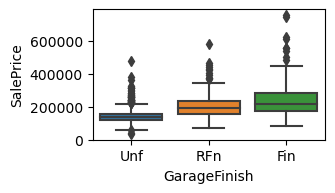

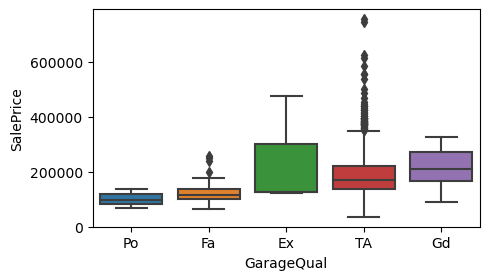

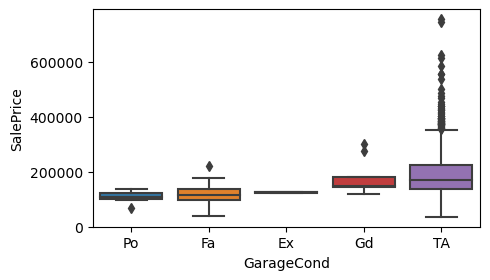

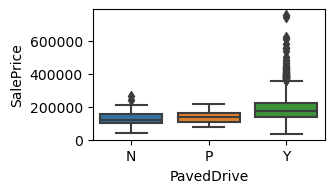

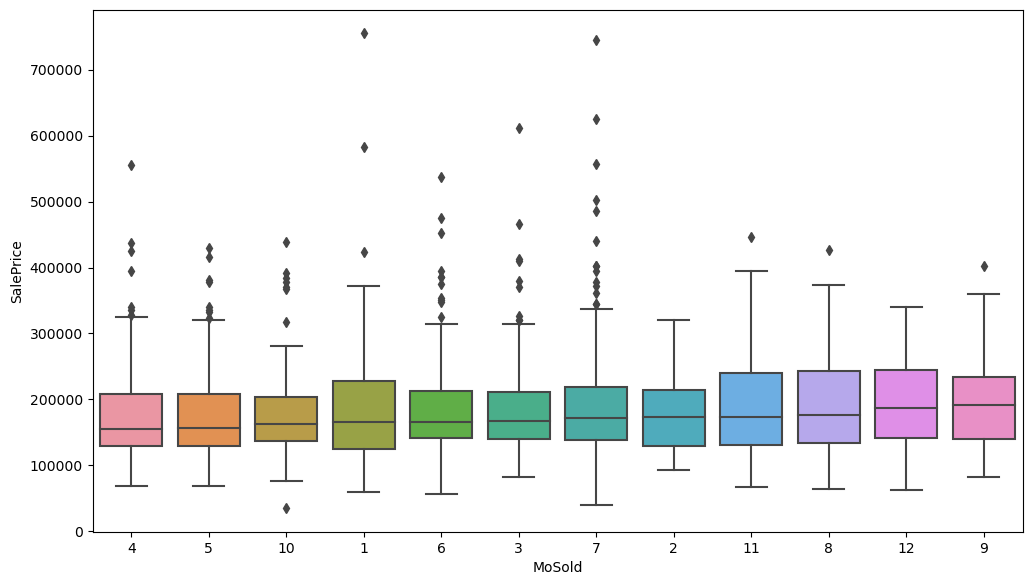

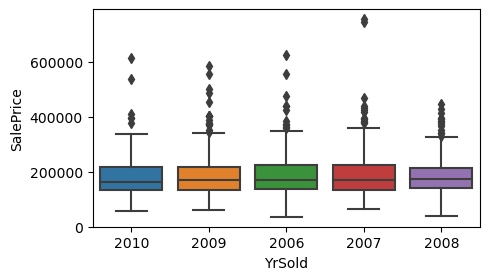

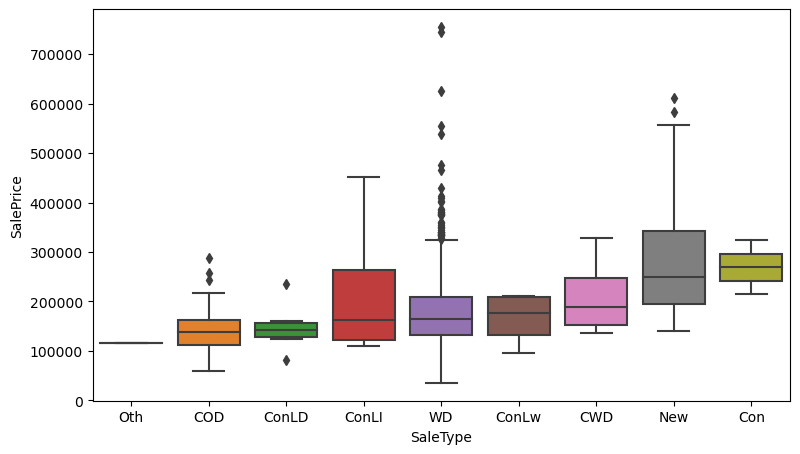

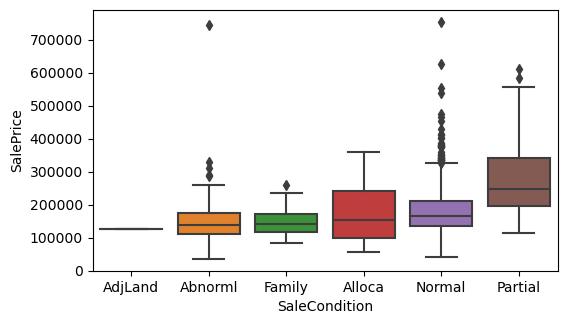

In [91]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

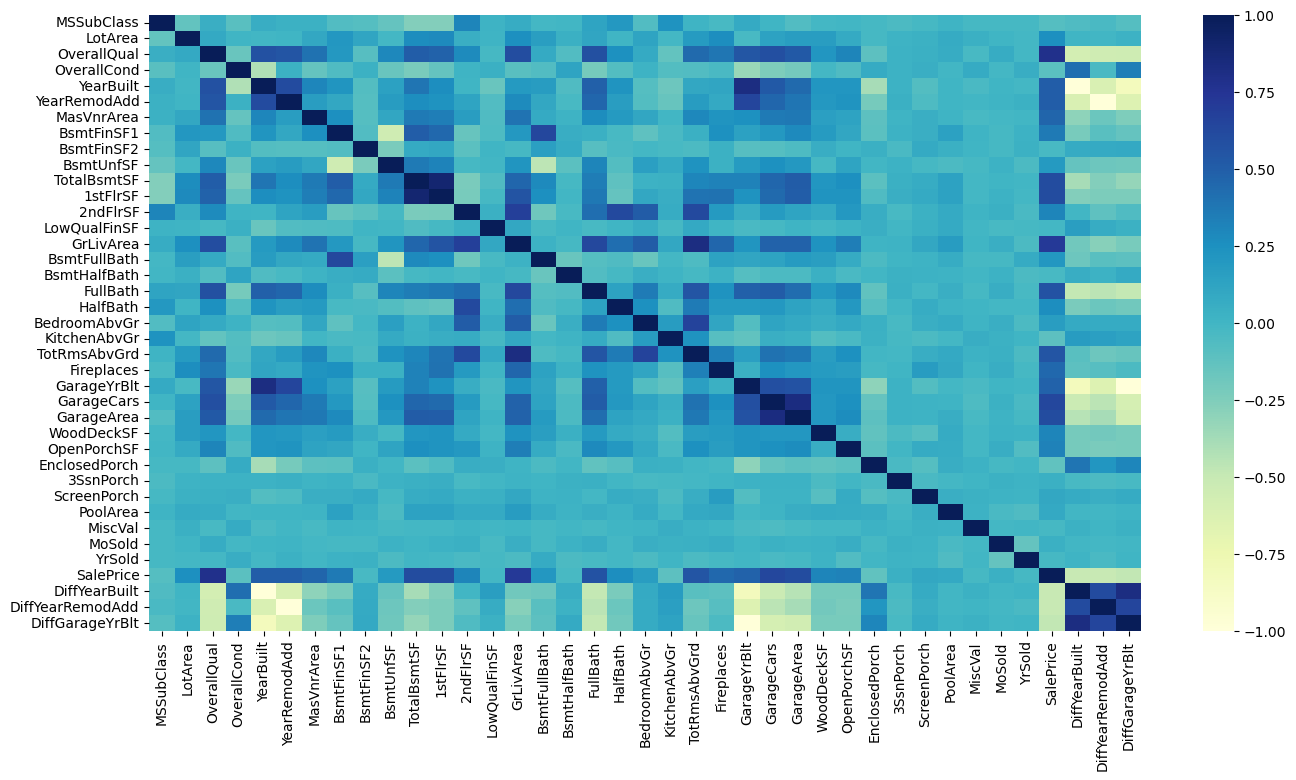

In [92]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot=False)
plt.show()

# Summary

There plots above shows there exist some linear relationship between various columns and output column.

The heatmap is condensed however we do have collinearity in data

# Dumify Categorical Fields

In [93]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df_data[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df_data = pd.concat([df_data, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df_data.drop([col], axis = 1, inplace = True)

df_data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


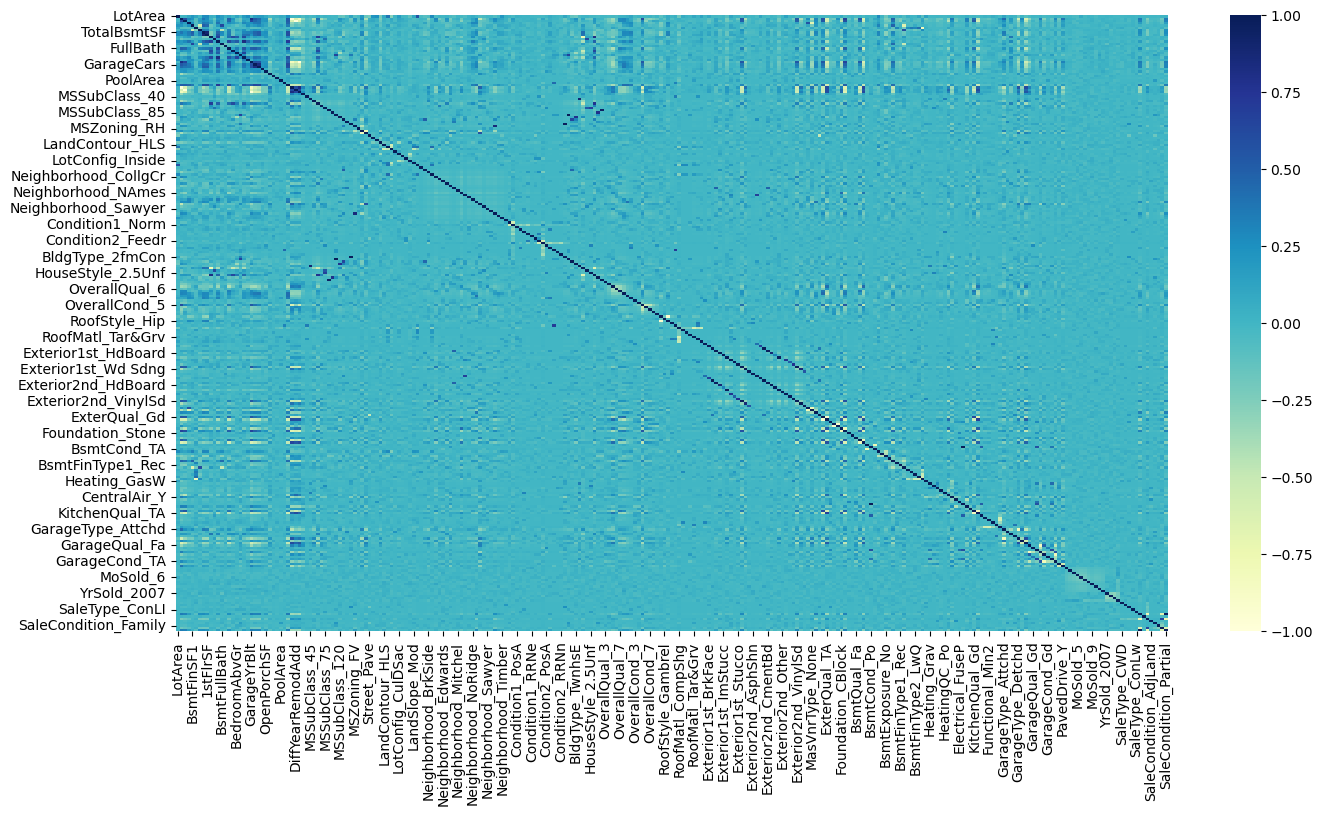

In [94]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot=False)
plt.show()

# Summary

The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.

# Data Preparation for Modelling

In [95]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df_data[num_col]))
# Outlier Removed Records
selected = df_data[num_col][(z < 3).all(axis=1)]
df_data = df_data.loc[selected.index]
df_data

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


In [96]:
# Preparing Test and Train Set

y = df_data.loc[:, out_col]
X = df_data.loc[:, df_data.columns != out_col]

# scale
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

# Simple Linear Regression

In [97]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9528333512101549
0.8984820444406528


In [98]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-525857.294, 'constant'),
 (-63863.821, 'MSSubClass_180'),
 (62640.815, 'SaleCondition_AdjLand'),
 (-53248.349, 'MSSubClass_85'),
 (47012.779, 'HouseStyle_SFoyer'),
 (44092.321, 'OverallQual_9'),
 (-42957.4, 'SaleCondition_Alloca'),
 (42036.962, 'MSZoning_FV'),
 (39549.886, 'HouseStyle_1.5Unf'),
 (39209.612, 'OverallQual_10'),
 (-37944.635, 'MSSubClass_80'),
 (36826.987, 'Exterior2nd_CmentBd'),
 (-36522.122, 'Neighborhood_MeadowV'),
 (-35873.347, 'MSSubClass_160'),
 (-33144.306, 'Functional_Mod'),
 (30698.139, 'SaleCondition_Partial'),
 (-30551.207, 'MSSubClass_90'),
 (-30551.207, 'BldgType_Duplex'),
 (30452.485, 'HouseStyle_SLvl'),
 (30308.413, 'OverallCond_9'),
 (-29947.172, 'MSSubClass_45'),
 (-29489.098, 'RoofMatl_WdShake'),
 (29459.633, 'MSZoning_RH'),
 (27882.273, 'OverallCond_8'),
 (26553.494, 'MSZoning_RL'),
 (-26510.601, 'SaleType_ConLI'),
 (26438.286, 'Foundation_Stone'),
 (26359.862, 'Condition1_RRNn'),
 (25205.134, 'Functional_Typ'),
 (23830.594, 'Neighborhood_StoneBr'),


# Summary 

Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.

Simple Linear Regression has not helped us in the feature selection.

# Ridge Regression

In [99]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014470,0.008845,0.003228,0.003954,0.0001,{'alpha': 0.0001},-20040.256818,-17967.075902,-15258.901538,-17502.421801,...,-17616.949786,1527.025105,26,-8737.003001,-8945.166118,-9844.210751,-9291.960715,-9425.734304,-9248.814978,385.178467
1,0.009728,0.006056,0.006323,0.005864,0.001,{'alpha': 0.001},-20027.830659,-17759.392909,-15181.867438,-17467.724044,...,-17541.619500,1541.145265,25,-8739.359052,-8951.056300,-9847.929777,-9292.639738,-9427.303278,-9251.657629,384.936980
2,0.012560,0.006280,0.003125,0.006250,0.01,{'alpha': 0.01},-19898.767497,-16814.836486,-14864.608162,-17201.725579,...,-17149.608560,1607.907567,24,-8758.827889,-8991.596631,-9875.386254,-9298.375155,-9438.644122,-9272.566010,383.278214
3,0.015773,0.003451,0.006872,0.003977,0.05,{'alpha': 0.05},-19387.795251,-16084.056206,-14262.329824,-16586.477091,...,-16545.029506,1644.749269,23,-8817.485726,-9050.513803,-9951.254475,-9323.263753,-9467.278612,-9321.959274,386.084982
4,0.013591,0.002813,0.003380,0.004699,0.1,{'alpha': 0.1},-18968.234339,-15768.549106,-13827.787686,-16208.502370,...,-16164.238946,1642.766428,21,-8871.944933,-9090.693200,-10013.223890,-9357.765057,-9492.690014,-9365.263419,388.561055


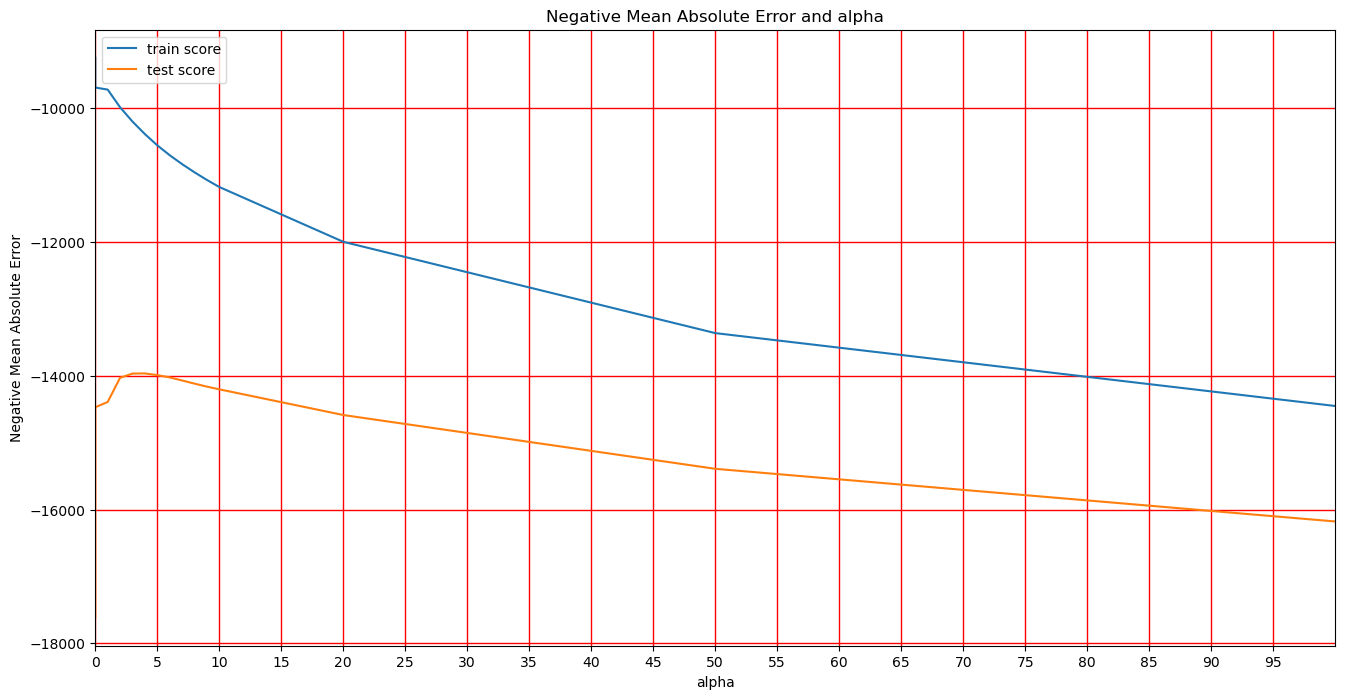

In [101]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [102]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9460249894962848
0.9152898297301237


In [103]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-484261.249, 'constant'),
 (26508.528, 'OverallQual_9'),
 (21072.822, 'Neighborhood_StoneBr'),
 (-17360.768, 'KitchenQual_Gd'),
 (17017.168, 'Functional_Typ'),
 (-16934.519, 'KitchenQual_TA'),
 (16306.799, 'Neighborhood_Crawfor'),
 (-15955.873, 'Functional_Mod'),
 (-15133.388, 'Neighborhood_MeadowV'),
 (-12748.031, 'SaleCondition_Alloca'),
 (12522.33, 'Exterior1st_BrkFace'),
 (11717.671, 'SaleCondition_Partial'),
 (-11558.389, 'OverallCond_3'),
 (-10949.877, 'Condition1_RRAe'),
 (-10826.345, 'MSSubClass_160'),
 (10825.35, 'BsmtExposure_Gd'),
 (-10550.902, 'Neighborhood_Edwards'),
 (-10502.732, 'KitchenQual_Fa'),
 (10327.416, 'MSZoning_FV'),
 (10207.03, 'OverallQual_10'),
 (-9935.215, 'OverallQual_4'),
 (9581.424, 'OverallCond_8'),
 (-9395.542, 'OverallQual_6'),
 (8705.198, 'BsmtFinType1_GLQ'),
 (8551.531, 'MasVnrType_Stone'),
 (-8479.422, 'BsmtQual_Gd'),
 (8322.03, 'Neighborhood_BrDale'),
 (8248.003, 'Condition1_Norm'),
 (-8213.917, 'BsmtQual_TA'),
 (-8094.663, 'Neighborhood_NWAmes')

# Summary

Ridge regression gave us a complex model with most of the coefficients as non-zero values.

Ridge regression has not helped us in the feature selection.

# Lasso Regression

In [104]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.298549,0.028806,0.004604,0.006216,0.0001,{'alpha': 0.0001},-20354.989290,-17139.509653,-15146.586233,-17522.701449,...,-17488.137806,1665.476378,27,-8739.546114,-8997.068544,-9855.239799,-9294.859731,-9430.943130,-9263.531464,380.707240
1,0.290633,0.022678,0.007314,0.004997,0.001,{'alpha': 0.001},-20351.941084,-17131.209484,-15144.100412,-17519.524150,...,-17483.646574,1665.599763,26,-8739.570861,-8997.070072,-9855.245437,-9294.846648,-9430.947550,-9263.536114,380.702141
2,0.274838,0.011803,0.001160,0.002320,0.01,{'alpha': 0.01},-20322.990556,-17056.620745,-15118.840954,-17486.896703,...,-17440.481851,1667.230864,25,-8739.937154,-8997.225114,-9855.416348,-9294.854997,-9431.030123,-9263.692747,380.640152
3,0.273124,0.013213,0.003054,0.003753,0.05,{'alpha': 0.05},-20303.619698,-16981.060842,-15078.585628,-17415.147825,...,-17356.992132,1681.741279,24,-8741.822025,-8998.252448,-9857.015693,-9295.137387,-9431.705720,-9264.786655,380.539318
4,0.282761,0.028732,0.004726,0.006270,0.1,{'alpha': 0.1},-20264.859289,-16955.900975,-15028.055928,-17393.540778,...,-17310.196283,1687.123558,23,-8744.295160,-8999.585884,-9859.435085,-9295.617117,-9432.800541,-9266.346758,380.530318


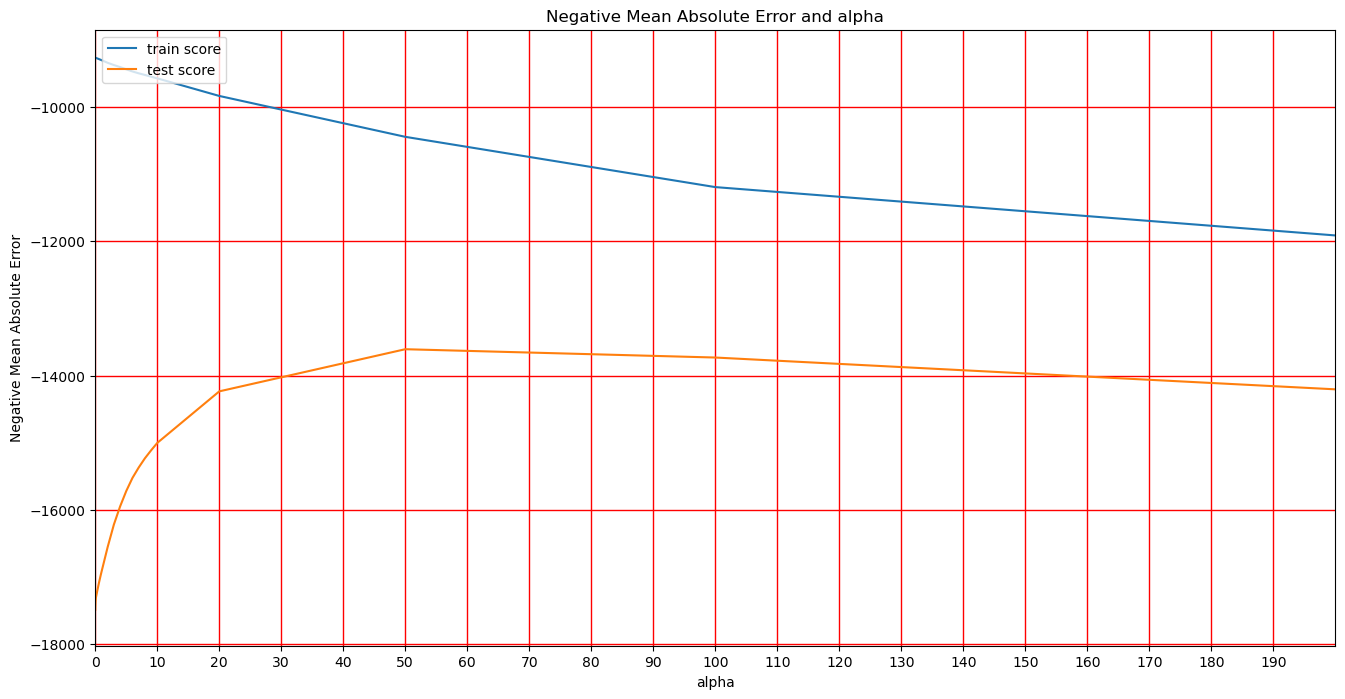

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [107]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9451804944627856
0.9145348792017312


In [108]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1750547.525, 'constant'),
 (44090.81, 'OverallQual_9'),
 (28811.319, 'OverallQual_10'),
 (-28616.24, 'SaleCondition_Alloca'),
 (27458.272, 'Neighborhood_StoneBr'),
 (-27408.595, 'Functional_Mod'),
 (23028.136, 'Neighborhood_Crawfor'),
 (-22777.991, 'Neighborhood_MeadowV'),
 (-19807.934, 'KitchenQual_TA'),
 (-19293.312, 'KitchenQual_Gd'),
 (18086.014, 'SaleCondition_Partial'),
 (17443.443, 'Exterior1st_BrkFace'),
 (15927.706, 'Functional_Typ'),
 (15336.547, 'OverallQual_8'),
 (-14376.206, 'Condition1_RRAe'),
 (-13807.831, 'KitchenQual_Fa'),
 (-13204.071, 'MSSubClass_160'),
 (12439.447, 'BsmtExposure_Gd'),
 (10677.755, 'MSZoning_FV'),
 (10541.689, 'Neighborhood_NoRidge'),
 (10172.209, 'Neighborhood_BrkSide'),
 (9456.502, 'OverallCond_8'),
 (8633.016, 'MasVnrType_Stone'),
 (8270.356, 'Exterior1st_CemntBd'),
 (-8254.628, 'OverallCond_3'),
 (8002.555, 'BsmtFinType1_GLQ'),
 (-7815.645, 'Neighborhood_Edwards'),
 (-7740.807, 'OverallCond_5'),
 (6881.349, 'Condition1_Norm'),
 (-6532.466, 'Bs

# Summary

Lasso Regression gave us a simpler model with most of the coefficients as zero values.

Lasso Regression has helped us in the feature selection.


# Automated selection of Predictors (RFE)

In [109]:
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [110]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt',
       'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_75',
       'MSSubClass_90', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [111]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [112]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(df_data[auto_selected_predictors]))

Parameters obtained for ['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_75', 'MSSubClass_90', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']
const                    -0.167748
YearBuilt               112.680486
YearRemodAdd              0.626287
1stFlrSF                124.806998
2ndFlrSF                 81.627518
GarageYrBlt             -83.512767
DiffYearBuilt          -452.033915
DiffYearRemodAdd       -339.979717
DiffGarageYrBlt        -255.840663
MSSubClass_75          7874.848618
MSSubClass_90         -4091.462699
Condition2_Feedr     -11850.173168
Condition2_Norm   

In [113]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211555.786196
OverallQual_9             91607.338623
OverallQual_10            72474.274804
SaleCondition_Alloca     -64806.887443
Neighborhood_StoneBr      32001.856483
Functional_Mod            -6000.629520
Neighborhood_Crawfor      40134.212919
Neighborhood_MeadowV     -76764.002034
KitchenQual_TA           -64442.203727
KitchenQual_Gd           -4029

In [114]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211932.673435
OverallQual_9             91627.401478
OverallQual_10            72494.448562
SaleCondition_Alloca     -64793.601281
Neighborhood_StoneBr      31976.977889
Functional_Mod            -6356.819275
Neighborhood_Crawfor      40138.519223
Neighborhood_MeadowV     -76703.816419
KitchenQual_TA           -64446.979291
KitchenQual_Gd           -40287.996529
SaleCondi

In [115]:
# MODEL 4
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211854.098572
OverallQual_9             91646.311525
OverallQual_10            72507.796095
SaleCondition_Alloca     -64714.770585
Neighborhood_StoneBr      31955.375853
Neighborhood_Crawfor      40179.705046
Neighborhood_MeadowV     -76466.582073
KitchenQual_TA           -64509.499322
KitchenQual_Gd           -40265.705617
SaleCondition_Partial     23492.508700
Exterior1st_BrkFace       3

In [116]:
# MODEL 5
lasso_selected_features.remove('OverallCond_8')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212926.722456
OverallQual_9             91357.734121
OverallQual_10            72242.997361
SaleCondition_Alloca     -64645.189868
Neighborhood_StoneBr      31791.000668
Neighborhood_Crawfor      40575.190078
Neighborhood_MeadowV     -75862.432497
KitchenQual_TA           -65002.186502
KitchenQual_Gd           -40595.949699
SaleCondition_Partial     23433.923444
Exterior1st_BrkFace       33688.408672
Overa

In [117]:
# MODEL 6
lasso_selected_features.remove('Neighborhood_BrkSide')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212474.326162
OverallQual_9             91460.977335
OverallQual_10            72472.257771
SaleCondition_Alloca     -63815.691357
Neighborhood_StoneBr      31863.853414
Neighborhood_Crawfor      40948.066014
Neighborhood_MeadowV     -75456.612663
KitchenQual_TA           -65061.358070
KitchenQual_Gd           -40405.521254
SaleCondition_Partial     23446.854316
Exterior1st_BrkFace       34014.610266
OverallQual_8             399

In [118]:
# MODEL 7
lasso_selected_features.remove('MSZoning_FV')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212090.098373
OverallQual_9             91693.159249
OverallQual_10            73443.100653
SaleCondition_Alloca     -63875.269308
Neighborhood_StoneBr      30357.730124
Neighborhood_Crawfor      40847.901932
Neighborhood_MeadowV     -77755.465273
KitchenQual_TA           -64873.284473
KitchenQual_Gd           -39842.292811
SaleCondition_Partial     24010.594905
Exterior1st_BrkFace       34120.910180
OverallQual_8             40185.141358
Condi

In [119]:
# MODEL 8
lasso_selected_features.remove('Condition1_Norm')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'BsmtQual_TA', 'GarageCond_Fa']
const                    216603.780767
OverallQual_9             91646.914523
OverallQual_10            73667.690253
SaleCondition_Alloca     -62617.702106
Neighborhood_StoneBr      30649.441876
Neighborhood_Crawfor      41139.872407
Neighborhood_MeadowV     -77277.730201
KitchenQual_TA           -65116.568862
KitchenQual_Gd           -39921.589684
SaleCondition_Partial     23921.682325
Exterior1st_BrkFace       33763.124187
OverallQual_8             40214.451337
Condition1_RRAe         

In [120]:
# MODEL 9
lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'BsmtQual_TA', 'GarageCond_Fa']
const                    220273.194346
OverallQual_9             92312.525236
OverallQual_10            74317.288936
SaleCondition_Alloca     -62669.002130
Neighborhood_StoneBr      29610.248933
Neighborhood_Crawfor      39487.910338
Neighborhood_MeadowV     -78764.789055
KitchenQual_TA           -64974.260017
KitchenQual_Gd           -39760.651420
SaleCondition_Partial     24752.541616
Exterior1st_BrkFace       32933.835323
OverallQual_8             40985.372071
Condition1_RRAe          -24666.780718
Ki

In [121]:
# final model parameters
lasso_selected_features

['OverallQual_9',
 'OverallQual_10',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'SaleCondition_Partial',
 'Exterior1st_BrkFace',
 'OverallQual_8',
 'Condition1_RRAe',
 'KitchenQual_Fa',
 'MSSubClass_160',
 'BsmtExposure_Gd',
 'Neighborhood_NoRidge',
 'MasVnrType_Stone',
 'Exterior1st_CemntBd',
 'OverallCond_3',
 'BsmtFinType1_GLQ',
 'Neighborhood_Edwards',
 'BsmtQual_TA',
 'GarageCond_Fa']

# Visualization and Conclusion of final model

Text(0, 0.5, 'Sales Price')

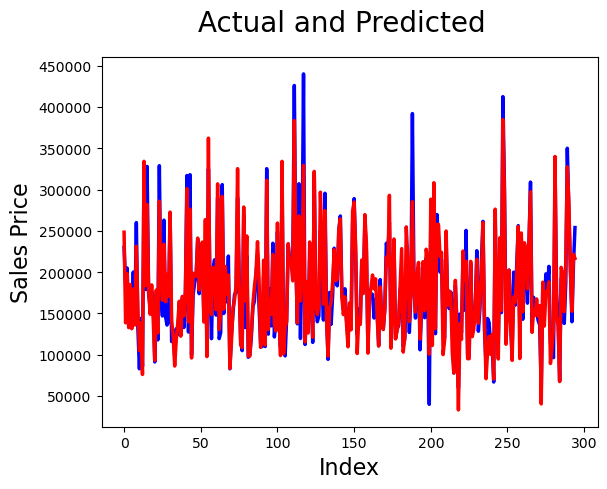

In [122]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

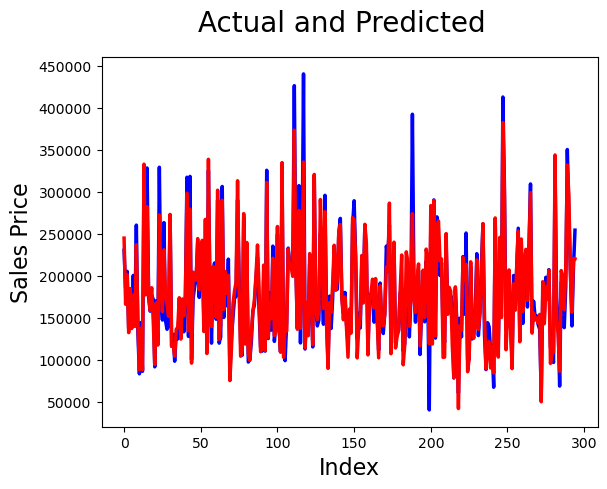

In [123]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

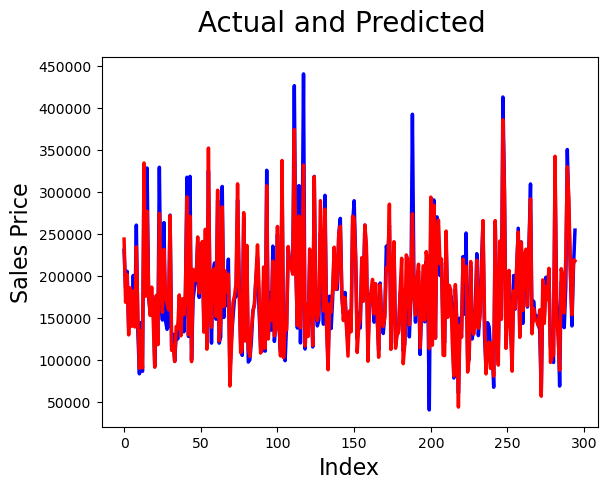

In [124]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

# Conclusion

In [127]:
print("Since the model accuracy on test and train set for all three models above are similar, we chose the simpler model.")
print("Simple Linear Regression model is fairly complex, hence we would not consider that.")
print("Ridge Regression model is fairly complex, hence we would not consider that.")
print("Optimum value of lambda for Ridge Regression is 4")
print("Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.")
print("Optimum value of lambda for Lasso Regression is 50")
print("Most important 30 features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

Since the model accuracy on test and train set for all three models above are similar, we chose the simpler model.
Simple Linear Regression model is fairly complex, hence we would not consider that.
Ridge Regression model is fairly complex, hence we would not consider that.
Optimum value of lambda for Ridge Regression is 4
Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
Optimum value of lambda for Lasso Regression is 50
Most important 30 features that are affecting Sales pricing are:
OverallQual_9                           Score: 44090.81
OverallQual_10                          Score: 28811.319
SaleCondition_Alloca                    Score: -28616.24
Neighborhood_StoneBr                    Score: 27458.272
Functional_Mod                          Score: -27408.595
Neighborhood_Crawfor                    Score: 23028.136
Neighborhood_MeadowV                    Score: -22777.991
KitchenQual_TA                          Score: -19807.934
K